In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/home/teemo/ML/data/ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


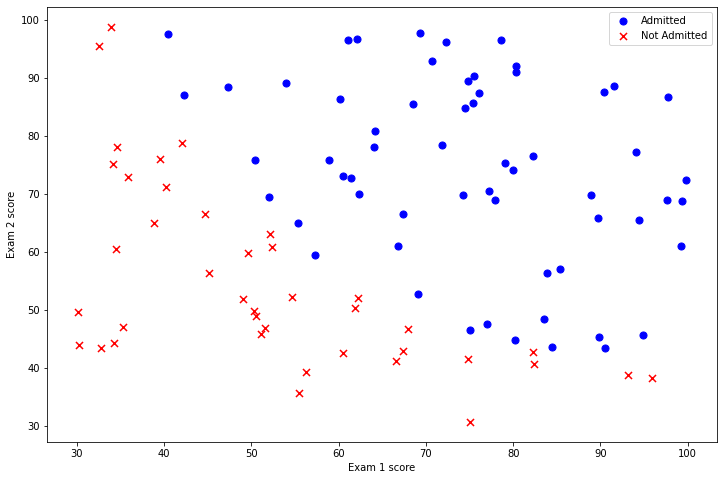

In [3]:
from cProfile import label


positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()


In [4]:
#sigmod函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
#逻辑回归代价函数
def cost(theta,x,y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y),np.log(1 - sigmoid(x * theta.T)))
    return np.sum(first - second)/(len(x))    

In [6]:
data.insert(0,'ones',1)

#初始化
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)

#转换类型
x = np.array(x.values)
y = np.array(y.values)


In [7]:
# 检查矩阵的维度
x.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [8]:
# 用初始θ计算代价
cost(theta, x, y)

0.6931471805599453

In [9]:
# 实现梯度计算的函数（并没有更新θ）
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [10]:
from unittest import result
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631537E-01   7.89087138E-01
    2    5  5.892425215690646E-01   7.39226659E+01
    3    7  4.227824013349988E-01   1.85265719E+01
    4    9  4.072926963747109E-01   1.68671130E+01
    5   11  3.818854870221429E-01   1.07735103E+01
    6   13  3.786234850041487E-01   2.31584929E+01
tnc: stepmx = 1000
    7   16  2.389268198743758E-01   3.00821998E+00
    8   18  2.047203892405198E-01   1.52227867E-01
    9   20  2.046713898944703E-01   6.62495276E-02
   10   22  2.035303162361215E-01   9.30780876E-04
tnc: fscale = 32.7775
   11   24  2.035293521271776E-01   8.07191978E-06
   12   26  2.035251112915609E-01   1.80213714E-04
   13   28  2.034984109909704E-01   5.02878482E-04
   14   30  2.034978382926863E-01   9.92360567E-06
   15   32  2.034977907837327E-01   3.77843767E-06
   16   34  2.034977388898613E-01   1.94830212E-05
   17   36  2.034977015894746E-01   2.33850311E-13


In [11]:
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [12]:
cost(result[0],x,y)

0.20349770158947458

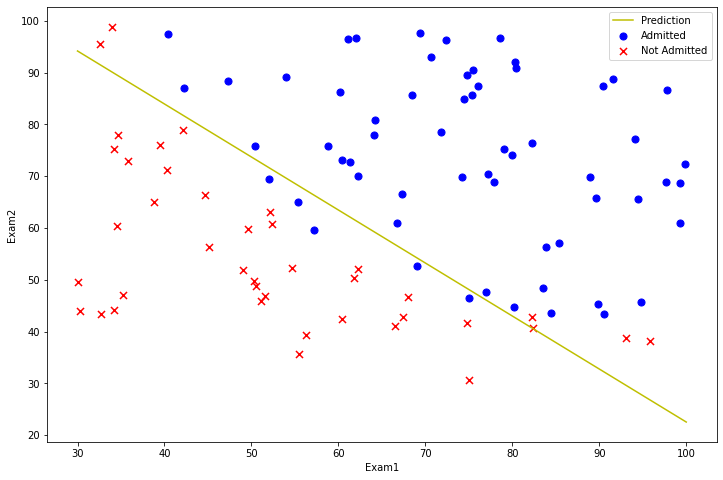

In [13]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = (-result[0][0]-result[0][1]*plotting_x1)/result[0][2]

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1,plotting_h1,'y',label = 'Prediction')
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
plt.show()


In [14]:
def hex(theta,x):
    return sigmoid(x@theta.T)
hex(result[0],[1,45,85])

0.7762906240463825

In [15]:
def predict(theta,x):
    probability = sigmoid(x * theta.T)
    return [1 if x>0.5 else 0 for x in probability]


In [16]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,x)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct)))/float(len(correct))*100
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89.0%


In [17]:
#正则化逻辑回归
path = '/home/teemo/ML/data/ex2data2.txt'
data2 = pd.read_csv(path,header = None,names=['Test1','Test2','Accept'])
data2.head()

,Test1,Test2,Accept
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


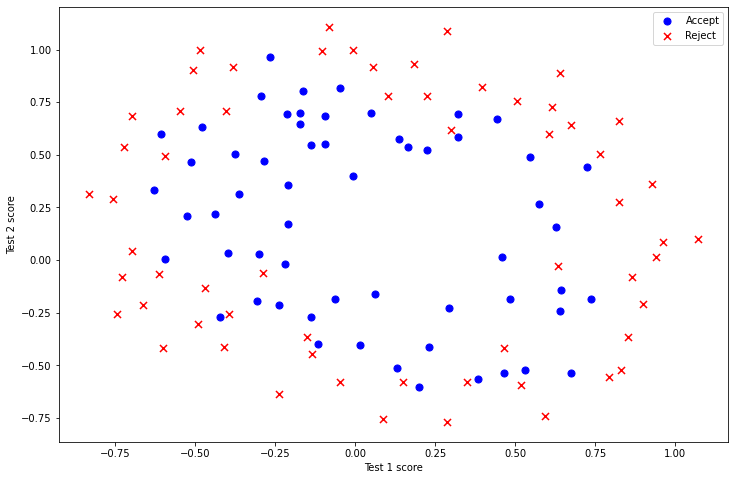

In [18]:
positive = data2[data2['Accept'].isin([1])]
negative = data2[data2['Accept'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accept')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Reject')
ax.legend()
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')
plt.show()

In [19]:
#如果样本量多，逻辑回归问题很复杂，而原始特征只有x1,x2可以用多项式创建更多的特征x1、x2、x1x2、x1^2、x2^2、... X1^nX2^n。因为更多的特征进行逻辑回归时，得到的分割线可以是任意高阶函数的形状。
degree = 6
x1 = data2['Test1']
x2 = data2['Test2']
data2.insert(3,'ones',1)

for i in range(1,degree+1):
    for j in range(0,i+1):
        data2['F'+str(i-j)+str(j)] = np.power(x1,i-j) * np.power(x2,j)

data2.drop('Test1',axis=1,inplace=True)
data2.drop('Test2',axis=1,inplace=True)


data2.head()        

,Accept,ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [20]:
#实现正则化的代价函数
def costReg(theta,x,y,leaning_rate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(x * theta.T)))
    #theta0不计算
    reg = (leaning_rate/(2*len(x)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    
    return np.sum(first - second)/len(x) + reg

In [21]:
#实现正则化的梯度函数
def gradientReg(theta,x,y,learning_rate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    paramaters = int(theta.ravel().shape[1])
    grad = np.zeros(paramaters)
    
    error = sigmoid(x * theta.T) - y
    for i in range(paramaters):
        temp = np.multiply(error,x[:,i])
        
        if i == 0 :
            grad[i] = np.sum(temp)/len(x)
        else :
            grad[i] = (np.sum(temp)/len(x)) + ((learning_rate/len(x))*theta[:,i])
    return grad
            
        
    

In [22]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
Y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols - 1)

X2 = np.array(X2.values)
Y2 = np.array(Y2.values)

learning_rate = 1

In [23]:
X2.shape,Y2.shape,theta2.shape
theta2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
costReg(theta2,X2,Y2,learning_rate)

0.6931471805599454

In [25]:
result2 =  opt.fmin_tnc(func = costReg,x0 = theta2,fprime=gradientReg,args = (X2,Y2,learning_rate))
result2

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    6  5.360726284899101E-01   9.47411926E-04
tnc: fscale = 32.4886
    2   11  5.291073384820831E-01   1.47908251E-05
    3   14  5.290104044626761E-01   3.98100760E-07
tnc: fscale = 1584.91
    4   19  5.290029439297650E-01   6.89676887E-09
    5   22  5.290028141689438E-01   3.25708339E-09
    6   27  5.290027426721196E-01   1.38868349E-09
tnc: |fn-fn-1] = 1.27076e-08 -> convergence


(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166928,  0.12393227, -0.36553118, -0.35725402, -0.17516292,
        -1.45817009, -0.05098418, -0.61558551, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603296, -0.04466179, -0.27778952, -0.29539513,
        -0.45645981, -1.04319155,  0.02779373, -0.29244873,  0.01555761,
        -0.32742406, -0.1438915 , -0.92467487]),
 32,
 1)

    7   32  5.290027299644862E-01   1.16972559E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [26]:
theta_min2 = np.matrix(result2[0])
predictions2 = predict(theta_min2,X2)
correct = [1 if((a==1 and b==1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions2,Y2)]
accuracy = sum(map(int,correct))/len(correct)*100
print("accuracy:%.2f%% " %(accuracy))

accuracy:83.05% 


In [27]:
def hfun2(theta2,x1,x2):
    temp = theta2[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp += np.power(x1, i-j) * np.power(x2, j) * theta2[0][place+1]
            place+=1
    return temp

In [28]:
def find_boundary(theta2):
    t1 = np.linspace(-1,1.5,1000)
    t2 = np.linspace(-1,1.5,1000)
    
    cordinates = [(a,b) for a in t1 for b in t2 ]
    x_cord,y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord,'x2':y_cord})
    h_val['hval'] = hfun2(theta2,h_val['x1'],h_val['x2'])
    
    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2
    
           

In [29]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfun2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

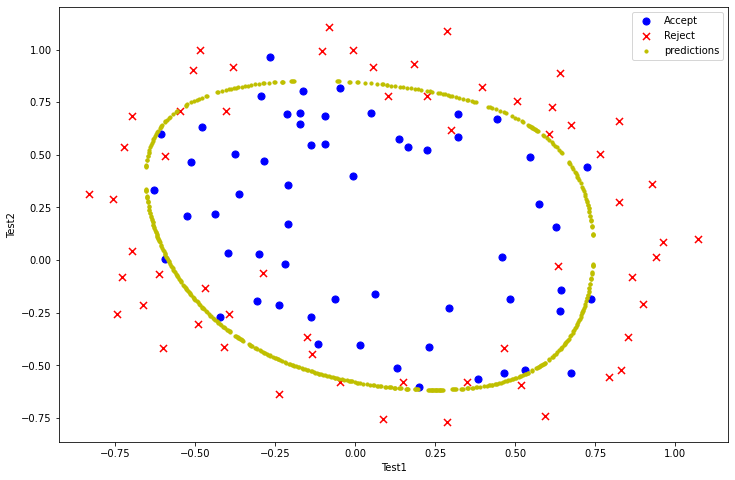

In [30]:
#画出决策曲线
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accept')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Reject')


ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
x,y = find_boundary(result2)
ax.scatter(x,y,c='y',s=10,label = 'predictions')
ax.legend()

plt.show()

In [31]:
learningRate2 = 2
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, Y2, learningRate2))

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    6  5.756386278665839E-01   4.25404594E-04
tnc: fscale = 48.4841
    2   10  5.735037680713952E-01   1.33140539E-05
    3   13  5.734022740975399E-01   4.61506037E-07
tnc: fscale = 1472.01
    4   18  5.733984876456204E-01   3.83580490E-09
    5   22  5.733984542587027E-01   1.31572455E-10
tnc: fscale = 87180.1
tnc: |fn-fn-1] = 2.59905e-09 -> convergence
    6   25  5.733984516596488E-01   3.37923249E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


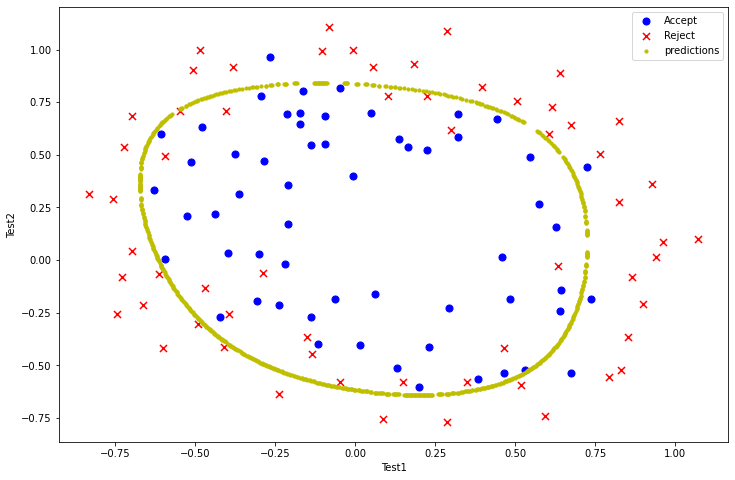

In [32]:

#画出决策曲线(lamda =0 过拟合情况 以及 =100 欠拟合情况)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accept')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Reject')


ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
x,y = find_boundary(result3)
ax.scatter(x,y,c='y',s=10,label = 'predictions')
ax.legend()

plt.show()